# Business Goal

- Build an Artificial Neural Network that recognizes objects that you hold into the webcam.

# CNN with Keras

## Create an image data-set

In [1]:
#import relevant packages and dictinories
import os
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Activation, Flatten, Dropout, BatchNormalization
from tensorflow.keras import models, layers
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [2]:
#load and create the image data-set
X = []
y = []
classes = ['apple', 'banana', 'cup', 'empty','glass','juice','lotion','pear']
base_path = './imageclassifier-main/data/'

for i, target in enumerate(classes):
    
    files = os.listdir(base_path+target)
    
    for file in files:
        # load the image
        img = load_img(base_path+target+'/'+file, target_size=(224, 224))
        # convert it to an array
        img_array = np.array(img)
        
        # append the array to X
        X.append(img_array)
        
        # append the numeric target to y
        y.append(i)

In [3]:
# create arrays
X = np.array(X)
y = np.array(y)

In [4]:
#check the shapes
X.shape, y.shape

((1110, 224, 224, 3), (1110,))

In [5]:
# shuffle the data
shuffler = np.random.permutation(len(X))
X = X[shuffler]
y = y[shuffler]

In [6]:
# train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [7]:
#check shapes
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((888, 224, 224, 3), (888,), (222, 224, 224, 3), (222,))

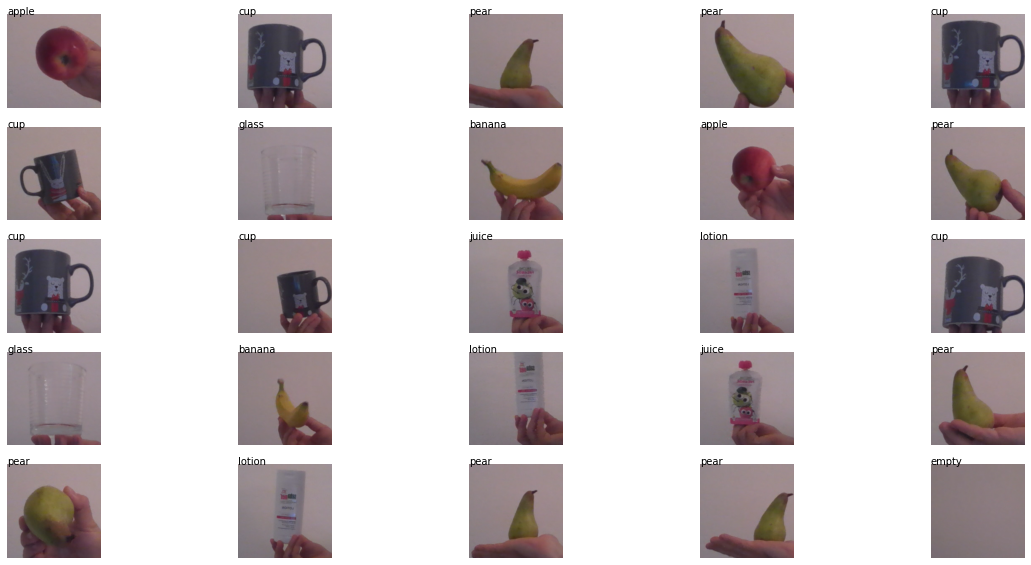

In [8]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
# have a look at the data
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[i])
    plt.axis('off')
    plt.text(0, 0, classes[y_train[i]]) 
   

In [9]:
#keep a copy of y test as the actual number labels for further process
y_test_true = y_test.copy()

In [10]:
#one hot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## Make a model

In [11]:
#clear session and build model
K.clear_session()

In [12]:
model_cnn = Sequential([
    Conv2D(filters = 64, kernel_size = (3,3), strides = (1,1), padding = "valid", activation = "relu" ,input_shape = (224,224,3)),
    MaxPooling2D(pool_size = (2,2),strides=(2,2),padding = "valid"),
    
    Conv2D(filters = 32, kernel_size = (3,3), strides = (1,1), padding = "valid", activation = "relu" ,input_shape = (224,224,3)),
    MaxPooling2D(pool_size = (2,2),strides=(2,2),padding = "valid"),
    
    Conv2D(filters = 16, kernel_size = (3,3), strides = (1,1), padding = "valid", activation = "relu"),
    MaxPooling2D(pool_size = (2,2),strides=(2,2),padding = "valid"),
    
    Flatten(),
    
    #fully connected layers
    
    Dense(100,activation='relu'),
    
    #batch normalisation
    BatchNormalization(),
    
    #dropout
    Dropout(0.2),
    
    #output layer
    Dense(8 ,activation= "softmax")

    
])

In [13]:
#check the summary:
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 16)        4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 10816)             0

In [14]:
#define early stopping for fitting
early_stop = keras.callbacks.EarlyStopping(
                                            monitor='val_loss', 
                                            min_delta=0.0005, 
                                            patience=3,
                                            verbose=1, 
                                            mode='auto',
                                           )

In [15]:
#compile the model
model_cnn.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
#fit the model
history = model_cnn.fit(X_train, y_train, batch_size=50, epochs=50,validation_split=0.2, callbacks=[early_stop])

Epoch 1/50
15/15 [==============================] - 67s 4s/step - loss: 0.8296 - accuracy: 0.7775 - val_loss: 34.5630 - val_accuracy: 0.0843
Epoch 2/50
15/15 [==============================] - 63s 4s/step - loss: 0.2393 - accuracy: 0.9775 - val_loss: 34.9955 - val_accuracy: 0.2022
Epoch 3/50
15/15 [==============================] - 55s 4s/step - loss: 0.1236 - accuracy: 0.9930 - val_loss: 33.8168 - val_accuracy: 0.1011
Epoch 4/50
15/15 [==============================] - 58s 4s/step - loss: 0.0888 - accuracy: 0.9958 - val_loss: 24.7758 - val_accuracy: 0.1011
Epoch 5/50
15/15 [==============================] - 65s 4s/step - loss: 0.0566 - accuracy: 1.0000 - val_loss: 22.7671 - val_accuracy: 0.1011
Epoch 6/50
15/15 [==============================] - 65s 4s/step - loss: 0.0426 - accuracy: 1.0000 - val_loss: 15.5660 - val_accuracy: 0.1011
Epoch 7/50
15/15 [==============================] - 64s 4s/step - loss: 0.0345 - accuracy: 1.0000 - val_loss: 11.4587 - val_accuracy: 0.1011
Epoch 8/50
15

## Examine the model

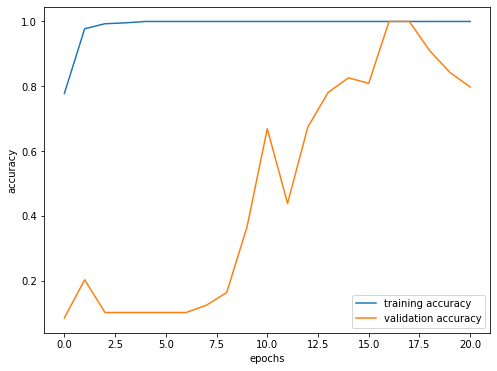

In [17]:
#plot accuracy curve
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label= 'validation accuracy')

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()


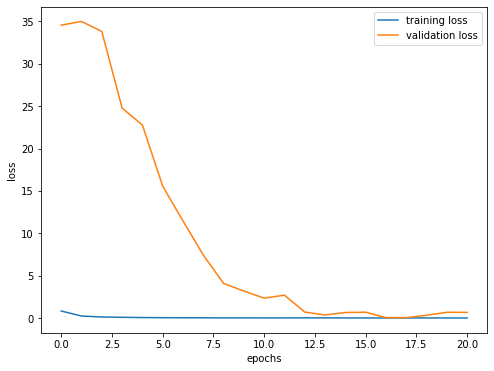

In [18]:
# Plot loss
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [19]:
ypred = model_cnn.predict(X_test)

In [20]:
#look at the first prediction
ypred[0]

array([4.7740661e-05, 5.2308019e-06, 7.1173172e-06, 3.5106488e-08,
       9.9809343e-01, 2.8578404e-05, 5.6170142e-04, 1.2561362e-03],
      dtype=float32)

In [21]:
np.argmax(ypred[0])

4

Text(0, 0, 'glass')

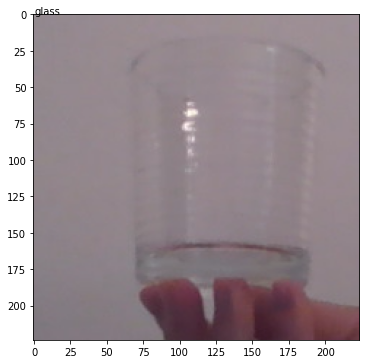

In [22]:
plt.figure(figsize=(8,6))
plt.imshow(X_test[0])
plt.text(0,0,classes[y_test_true[0]])

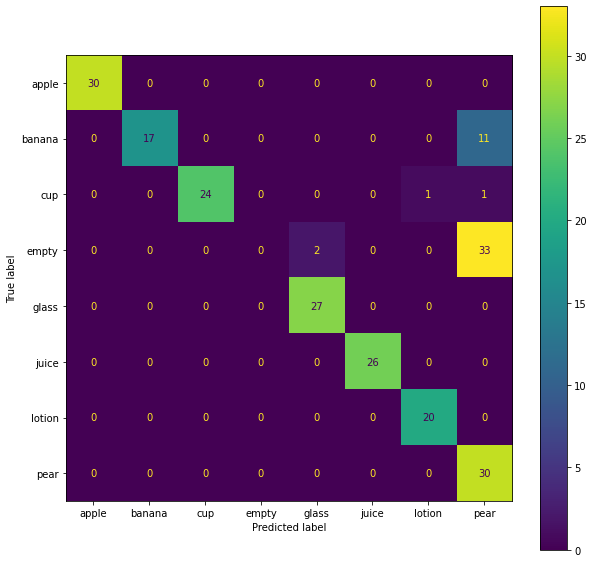

In [23]:
#plot confusion matrix
cm = confusion_matrix(y_true=y_test_true, y_pred=np.argmax(ypred, axis=1))

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=classes)
fig, ax = plt.subplots(figsize=(10,10))

disp.plot(ax=ax);

In [24]:
#save the model
model_cnn.save('./imageclassifier-main/models/model_cnn.h5')

# Pre-trained Model

In [25]:
from tensorflow.keras.applications import mobilenet_v2
from tensorflow.keras import preprocessing 

## MobilNetV2

In [26]:
#clear session and build model
K.clear_session()
#create the mobilnet  pre-trained model
mobilnet_model = mobilenet_v2.MobileNetV2(
    weights='imagenet', 
    alpha=0.35,         # specific parameter of this model, small alpha reduces the number of overall weights
    pooling='avg',      # applies global average pooling to the output of the last conv layer (like a flattening)
    include_top=True,  # <------ !!!!! we only want to have the base, not the final dense layers 
    input_shape=(224, 224, 3)
)

In [27]:
mobilnet_model.summary()

Model: "mobilenetv2_0.35_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 16) 432         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 16) 64          Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 16) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

## VGG16

In [28]:
#clear session and build model
K.clear_session()
vgg_model = keras.applications.vgg16.VGG16(weights="imagenet")

In [29]:
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

## Test the base pre-trained models

In [30]:
path = './imageclassifier-main/data/all/' 
files = []

for file in os.listdir(path=path):
    files.append(file)
files

['12-23-43-987341.png',
 '12-25-11-110892.png',
 '12-26-37-854735.png',
 '12-28-26-653787.png',
 '22-17-42-115413.png',
 '22-21-28-458391.png',
 '22-24-12-789289.png',
 '22-26-33-757548.png']

100%|██████████| 8/8 [00:07<00:00,  1.14it/s]


'./imageclassifier-main/data/all/22-26-33-757548.png'

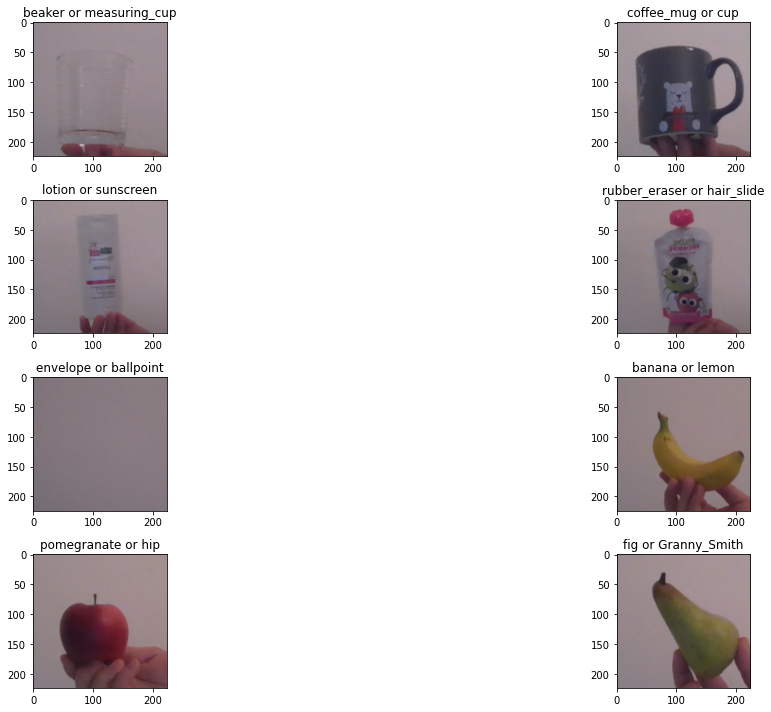

In [31]:
#test your base pre-trained model with different images
from tqdm import tqdm

def batch_prediction_vgg(files = files):

    for i in tqdm(range(len(files))):
        
        """read and preprocess"""
        my_path = f'{path}{files[i]}'
        pic = keras.preprocessing.image.load_img(my_path,target_size=(224,224))
        numpy_image = np.array(pic)
        image_batch = np.expand_dims(numpy_image, axis=0)
        processed_image = keras.applications.vgg16.preprocess_input(image_batch)
        
        """predict"""
        predictions = vgg_model.predict(processed_image)
        label_vgg = keras.applications.imagenet_utils.decode_predictions(predictions)

        """plot"""
        plt.subplot(4,2,i+1);
        plt.tight_layout()
        plt.imshow(pic)
        plt.title(f"""{label_vgg[0][0][1]} or {label_vgg[0][1][1]}""" )
    return my_path
    

batch_prediction_vgg()

100%|██████████| 8/8 [00:02<00:00,  3.46it/s]


'./imageclassifier-main/data/all/22-26-33-757548.png'

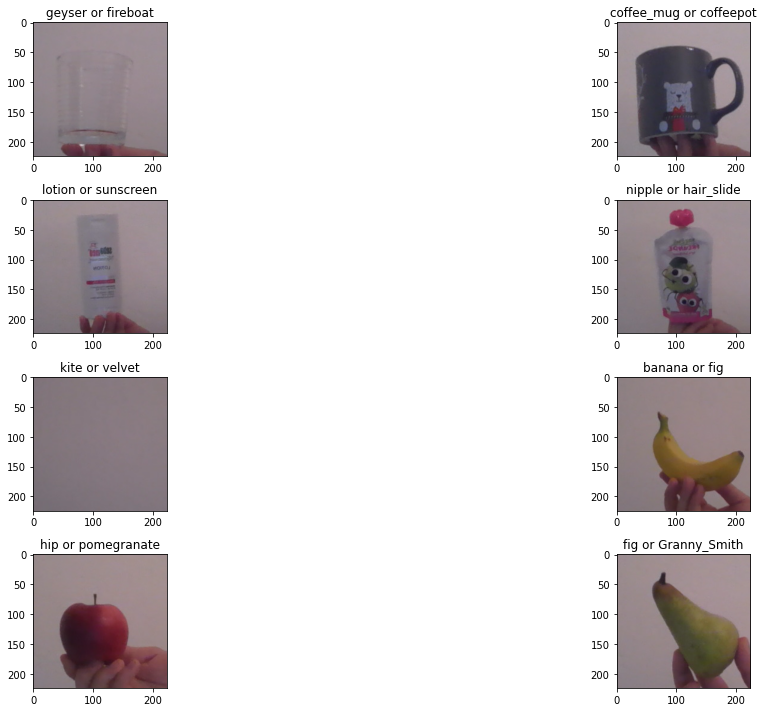

In [32]:
#test your base pre-trained model with different images
from tqdm import tqdm

def batch_prediction_mobilnet(files = files):

    for i in tqdm(range(len(files))):
        
        """read and preprocess"""
        my_path = f'{path}{files[i]}'
        pic = keras.preprocessing.image.load_img(my_path,target_size=(224,224))
        numpy_image = np.array(pic)
        image_batch = np.expand_dims(numpy_image, axis=0)
        processed_image = keras.applications.mobilenet_v2.preprocess_input(image_batch)
        
        """predict"""
        predictions = mobilnet_model.predict(processed_image)
     
        label_mobil = keras.applications.mobilenet_v2.decode_predictions(predictions)

        """plot"""
        plt.subplot(4,2,i+1);
        plt.tight_layout()
        plt.imshow(pic)
        plt.title(f"""{label_mobil[0][0][1]} or {label_mobil[0][1][1]}""" )
    return my_path
    

batch_prediction_mobilnet()

## Save the pre-trained models

In [33]:
mobilnet_model.save('./imageclassifier-main/models/mobilnet.h5')

In [34]:
vgg_model.save('./imageclassifier-main/models/vgg.h5')

# Transfer Learning

In [35]:
# freeze the weights
mobilnet_model.trainable = False
vgg_model.trainable = False

In [36]:
mobilnet_model.summary()

Model: "mobilenetv2_0.35_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 16) 432         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 16) 64          Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 16) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [37]:
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [38]:
#clear session and build model
K.clear_session()

# create the model
model_transfer = keras.Sequential()
model_transfer.add(mobilnet_model)
model_transfer.add(keras.layers.Dense(100, activation='relu'))
model_transfer.add(keras.layers.Dropout(0.5))
model_transfer.add(keras.layers.Dense(len(classes), activation='softmax'))

In [39]:
# have a look at the trainable and non-trainable params statistic
model_transfer.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_0.35_224 (Functi (None, 1000)              1691208   
_________________________________________________________________
dense (Dense)                (None, 100)               100100    
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 808       
Total params: 1,792,116
Trainable params: 100,908
Non-trainable params: 1,691,208
_________________________________________________________________


In [40]:
#compile the model
model_transfer.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss=keras.losses.categorical_crossentropy,
              metrics=[keras.metrics.categorical_accuracy])

In [41]:
# observe the validation loss and stop when it does not improve after 2 iterations
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

In [42]:
#fit the model
m=model_transfer.fit(X_train, y_train, 
          epochs=50, 
          verbose=2,
          batch_size=50, 
          callbacks=[callback],
          # use 20% of the data for validation
          validation_split=0.2)

Epoch 1/50
15/15 - 20s - loss: 2.0699 - categorical_accuracy: 0.2901 - val_loss: 2.0513 - val_categorical_accuracy: 0.5899
Epoch 2/50
15/15 - 11s - loss: 2.0383 - categorical_accuracy: 0.6070 - val_loss: 2.0177 - val_categorical_accuracy: 0.7079
Epoch 3/50
15/15 - 12s - loss: 2.0022 - categorical_accuracy: 0.6648 - val_loss: 1.9744 - val_categorical_accuracy: 0.7865
Epoch 4/50
15/15 - 17s - loss: 1.9526 - categorical_accuracy: 0.7352 - val_loss: 1.9210 - val_categorical_accuracy: 0.7921
Epoch 5/50
15/15 - 17s - loss: 1.8987 - categorical_accuracy: 0.7507 - val_loss: 1.8568 - val_categorical_accuracy: 0.8146
Epoch 6/50
15/15 - 16s - loss: 1.8268 - categorical_accuracy: 0.7986 - val_loss: 1.7795 - val_categorical_accuracy: 0.8427
Epoch 7/50
15/15 - 16s - loss: 1.7503 - categorical_accuracy: 0.8155 - val_loss: 1.6939 - val_categorical_accuracy: 0.8427
Epoch 8/50
15/15 - 16s - loss: 1.6684 - categorical_accuracy: 0.8225 - val_loss: 1.6001 - val_categorical_accuracy: 0.8427
Epoch 9/50
15/15

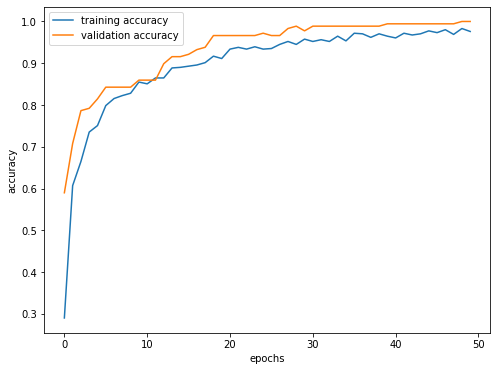

In [43]:
#plot accuracy curve
plt.figure(figsize=(8,6))
plt.plot(m.history['categorical_accuracy'], label='training accuracy')
plt.plot(m.history['val_categorical_accuracy'], label= 'validation accuracy')

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

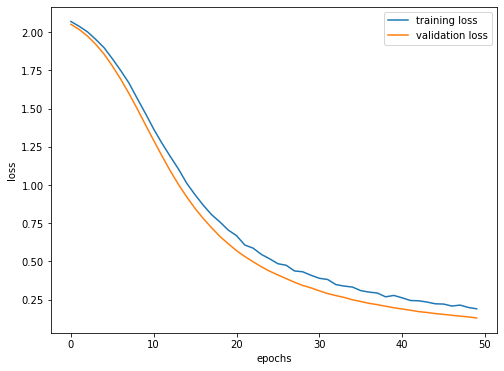

In [44]:
# Plot loss
plt.figure(figsize=(8,6))
plt.plot(m.history['loss'], label='training loss')
plt.plot(m.history['val_loss'], label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [45]:
ypred_t = model_transfer.predict(X_test)

In [46]:
#look at the first prediction
ypred_t[0]

array([0.0036367 , 0.01127246, 0.00142907, 0.00476632, 0.910168  ,
       0.00137907, 0.06252502, 0.00482337], dtype=float32)

In [47]:
np.argmax(ypred_t[0])

4

Text(0, 0, 'glass')

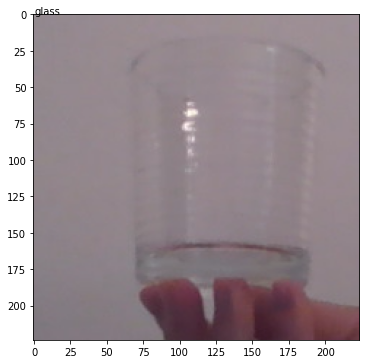

In [48]:
plt.figure(figsize=(8,6))
plt.imshow(X_test[0])
plt.text(0,0,classes[y_test_true[0]])

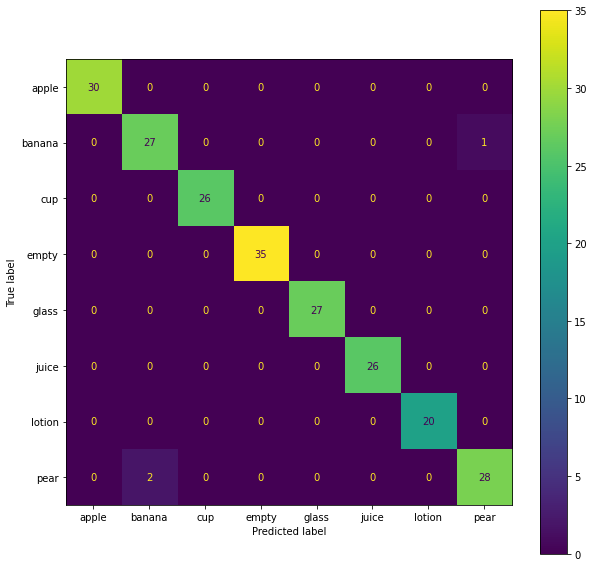

In [49]:
#plot confusion matrix
cm_t = confusion_matrix(y_true=y_test_true, y_pred=np.argmax(ypred_t, axis=1))

disp = ConfusionMatrixDisplay(confusion_matrix=cm_t,
                             display_labels=classes)
fig, ax = plt.subplots(figsize=(10,10))

disp.plot(ax=ax);

In [50]:
model_transfer.save('./imageclassifier-main/models/model_transfer.h5')